## 1. Import Necessary Libraries

In [137]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from pickle import dump

## 2.Import Data

In [4]:
weight_height_data = pd.read_csv("weight-height.csv")
weight_height_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## 3.Data Understanding

In [6]:
weight_height_data.shape

(10000, 3)

In [7]:
weight_height_data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [12]:
weight_height_data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [13]:
weight_height_data.duplicated

<bound method DataFrame.duplicated of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]>

## 4.Data Preparation

- Already the data is cleaned and no null elements present 

### **Let's Do Feature Engineering**

**It is nothing but a concept of whatever you do with Features , we call it as Feature Engineering.**

 - Feature Deletion
 - Feature Addition
 - Feature Selection
 - Feature Decomposition
 - Feature Transformation
   

### We are interested to convert units of Height from inches to cm and weight from pounds to kg


In [34]:
weight_height_data_copied = weight_height_data.copy()

In [35]:
weight_height_data_copied

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [62]:
print(weight_height_data_copied.columns.tolist())

['Height_cm', 'Weigth_kg']


In [37]:
weight_height_data_copied["Weigth_"] = weight_height_data_copied["Weight"]/2.205 #This is to convert from pounds to kg
weight_height_data_copied

,Gender,Height,Weight,Height_cm,Weigth_kg
0,Male,73.847017,241.893563,187.571423,109.702296
1,Male,68.781904,162.310473,174.706036,73.610192
2,Male,74.110105,212.740856,188.239668,96.481114
3,Male,71.730978,220.042470,182.196685,99.792504
4,Male,69.881796,206.349801,177.499761,93.582676
...,...,...,...,...,...
9995,Female,66.172652,136.777454,168.078536,62.030591
9996,Female,67.067155,170.867906,170.350573,77.491114
9997,Female,63.867992,128.475319,162.224700,58.265451
9998,Female,69.034243,163.852461,175.346978,74.309506


In [38]:
weight_height_data_copied.drop(labels = ["Height" ,"Weight"],axis = 1 , inplace = True) 

In [39]:
weight_height_data_copied

,Gender,Height_cm,Weigth_kg
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676
...,...,...,...
9995,Female,168.078536,62.030591
9996,Female,170.350573,77.491114
9997,Female,162.224700,58.265451
9998,Female,175.346978,74.309506


## Let's Perform Assumptions Test

In [49]:
print(weight_height_data_copied.columns.tolist())


['Gender', 'Height_cm', 'Weigth_kg']


#### Assumption-1: Normality Test

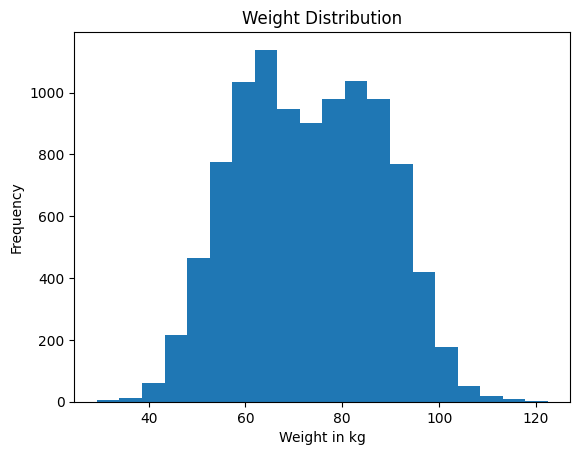

In [50]:
plt.hist(weight_height_data_copied['Weigth_kg'], bins=20)
plt.xlabel('Weight in kg')
plt.ylabel('Frequency')
plt.title('Weight Distribution')
plt.show()

#### Assumption-2: Linearity Test

In [66]:
weight_height_data_copied

,Height_cm,Weigth_kg
0,187.571423,109.702296
1,174.706036,73.610192
2,188.239668,96.481114
3,182.196685,99.792504
4,177.499761,93.582676
...,...,...
9995,168.078536,62.030591
9996,170.350573,77.491114
9997,162.224700,58.265451
9998,175.346978,74.309506


<Axes: xlabel='Weigth_kg', ylabel='Height_cm'>

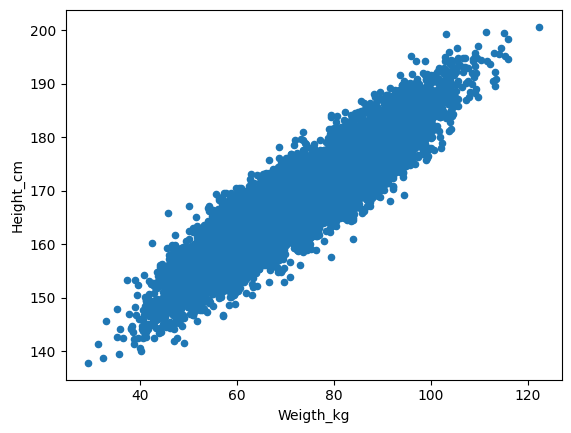

In [67]:
weight_height_data_copied.plot(x = 'Weigth_kg' , y='Height_cm' , kind = 'scatter')

#### Assumption-3: Multicollinearity

In [68]:
weight_height_data_copied.corr()

,Height_cm,Weigth_kg
Height_cm,1.000000,0.924756
Weigth_kg,0.924756,1.000000


### Here no multicollinearity in our data so move on to next test

#### Assumption-4: No Auto Regression 

#### Assumption-5: Homoscadasticity Test
#### Assumption-6: Zero Residual Mean Test

**Note: These 2 tests will be performed post model Training**

## 5. Model Building

In [81]:
x = weight_height_data_copied[['Weigth_kg']]
y = weight_height_data_copied[['Height_cm']]

In [82]:
x

,Weigth_kg
0,109.702296
1,73.610192
2,96.481114
3,99.792504
4,93.582676
...,...
9995,62.030591
9996,77.491114
9997,58.265451
9998,74.309506


In [83]:
y

,Height_cm
0,187.571423
1,174.706036
2,188.239668
3,182.196685
4,177.499761
...,...
9995,168.078536
9996,170.350573
9997,162.224700
9998,175.346978


## 6. Model Training

In [75]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
linear_model.coef_

array([[0.62062922]])

In [86]:
linear_model.intercept_

array([123.13387264])

## 7. Model Testing

### Manual Testing

In [87]:
#y = mx + c 
#If Weight is 95kg , what will be the Height?
(0.62062922*95) + 123.13387264

182.09364854

In [88]:
#If weight is 75 kg , what will be the Height ?
(0.62062922*75) + 123.13387264

169.68106414

In [89]:
#If Weight is 110kg , what will the Height?
(0.62062922*110) + 123.13387264

191.40308684000001

### Automatic Prediction

In [104]:
#X_test = pd.DataFrame(data = [95 , 75 , 110]) 
#X_test

In [109]:
y_pred = linear_model.predict(x)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,191.218323
1,168.818508
2,183.012871
3,185.068016
4,181.214016
...,...
9995,161.631870
9996,171.227122
9997,159.295114
9998,169.252524


## 8. Model Evaluation

In [107]:
y

,Height_cm
0,187.571423
1,174.706036
2,188.239668
3,182.196685
4,177.499761
...,...
9995,168.078536
9996,170.350573
9997,162.224700
9998,175.346978


In [110]:
y_pred

,0
0,191.218323
1,168.818508
2,183.012871
3,185.068016
4,181.214016
...,...
9995,161.631870
9996,171.227122
9997,159.295114
9998,169.252524


In [121]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# X must be 2D
X = weight_height_data_copied[['Height_cm']].values    # shape becomes (10000, 1)

# y can be 1D or 2D, both work, but 1D is typical
y = weight_height_data_copied['Weigth_kg'].values      # shape becomes (10000,)

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Predict, result is already 2D shape (10000,) but you can reshape if needed
y_pred = model.predict(X).reshape(-1, 1)               # now shape is (10000, 1)

# Convert both to 2D DataFrame
y_df = pd.DataFrame(y, columns=['Actual_Weight'])
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Weight'])

# Combine
result = pd.concat([y_df, y_pred_df], axis=1)

# Calculate error (also 2D)
result['Error'] = result['Actual_Weight'] - result['Predicted_Weight']
result

,Actual_Weight,Predicted_Weight,Error
0,109.702296,99.392961,10.309335
1,73.610192,81.665554,-8.055362
2,96.481114,100.313745,-3.832632
3,99.792504,91.987030,7.805473
4,93.582676,85.515069,8.067607
...,...,...,...
9995,62.030591,72.533423,-10.502832
9996,77.491114,75.664096,1.827018
9997,58.265451,64.467336,-6.201885
9998,74.309506,82.548716,-8.239210


In [122]:
result.mean()

Actual_Weight       7.321558e+01
Predicted_Weight    7.321558e+01
Error              -3.292371e-14
dtype: float64

## Let's Check Assumption 5: Homoscadasticity Test

**It is a plot between Input and the Error**

<Axes: >

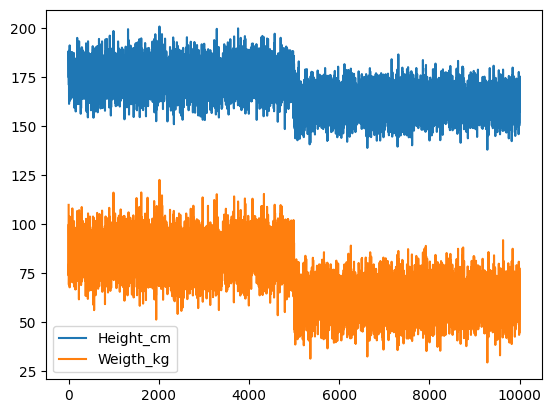

In [124]:
weight_height_data_copied.plot() #We cant use this method now 

In [127]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# X and y
X = weight_height_data_copied[['Height_cm']]
y = weight_height_data_copied['Weigth_kg']

model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [131]:
y_pred = model.predict(X)

# Convert to Series so subtraction works perfectly
y_pred_series = pd.Series(y_pred, index=y.index)

error = y - y_pred_series
error

0       10.309335
1       -8.055362
2       -3.832632
3        7.805473
4        8.067607
          ...    
9995   -10.502832
9996     1.827018
9997    -6.201885
9998    -8.239210
9999    -6.192866
Length: 10000, dtype: float64

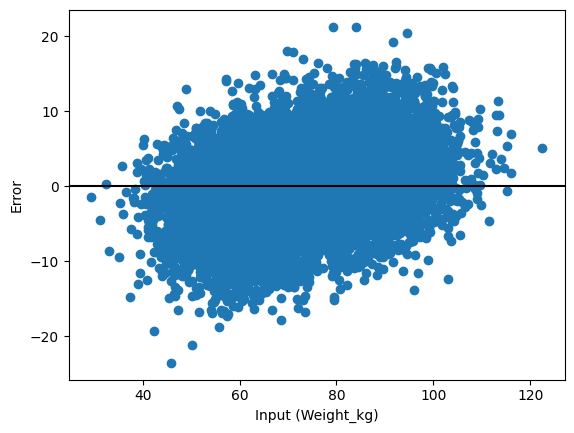

In [129]:
plt.scatter(x = weight_height_data_copied['Weigth_kg'], y = error)
plt.xlabel('Input (Weight_kg)')
plt.ylabel('Error')
plt.axhline(0, color='black')   # horizontal zero line
plt.show()

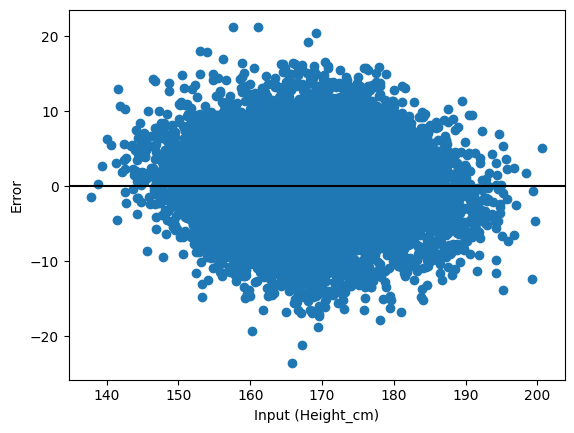

In [130]:
plt.scatter(x = weight_height_data_copied['Height_cm'], y = error)
plt.xlabel('Input (Height_cm)')
plt.ylabel('Error')
plt.axhline(0, color='black')
plt.show()

## Assumption 6: Zero Residual Mean Test across the Fitted Line

**It is a plot btw Actual Output and Predicted Output**

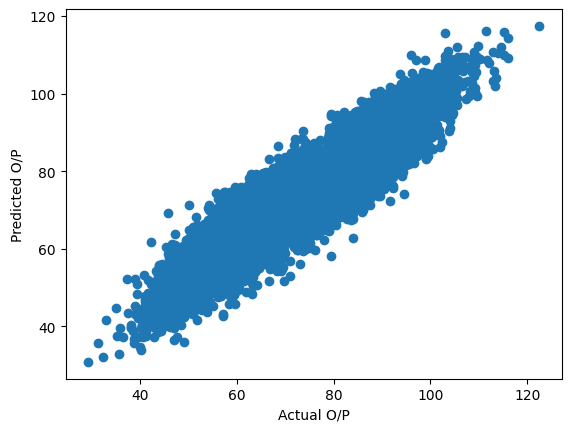

In [134]:
plt.scatter(x = y,y = y_pred)
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/P')
plt.show()

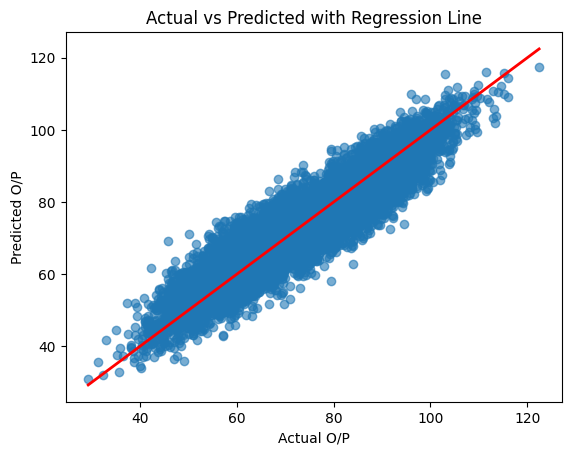

In [135]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y, y_pred, alpha=0.6)

# Add the ideal straight line
x_line = np.linspace(y.min(), y.max(), 100)
plt.plot(x_line, x_line, color='red', linewidth=2)

plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/P')
plt.title('Actual vs Predicted with Regression Line')

plt.show()


## 9.Model Deployement

In [136]:
from pickle import dump

In [139]:
dump(linear_model,open('height_intelligence.pkl','wb')) #Write bytes

In [140]:
from pickle import load

In [141]:
loaded_inteligence = load(open('height_intelligence.pkl','rb'))

In [142]:
loaded_inteligence

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [146]:
loaded_inteligence.predict(x)

array([[191.21832319],
       [168.81850845],
       [183.01287094],
       ...,
       [159.29511386],
       [169.25252357],
       [155.12206037]], shape=(10000, 1))

# The End !!